# Electrical Fault detection

We have to predict faults in a power system.

# Dataset Desciption

The dataset contains one file 

detect_dataset.csv

shape of the dataset is (12001, 9)

# Columns in dataset

there are seven columns

'Output (S)',

'Ia',

'Ib',

'Ic',

'Va', 

'Vb', 

'Vc', 

'Unnamed: 7',

'Unnamed: 8'

Outputs - 0 (No-fault) or 1(Fault is present)

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist 
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("detect_dataset.csv")

Saving detect_dataset.csv to detect_dataset.csv


In [3]:
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


# basic EDA

In [4]:
#checking shape of the dataset
df.shape

(12001, 9)

In [5]:
# checking columns of dataset
df.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [6]:
# checking length of dataset
len(df)

12001

In [7]:
# Checking which columns are having categorical, numerical or boolean values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [8]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
df.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526952,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


In [9]:
# Checking for missing values in all the columnns of the dataset
df.isna().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

In [10]:
# looping through datatset to find count of unique values of each column to gain more insights on the dataset
for col in df:
  print(str(col)+":",len(df[col].unique()))


Output (S): 2
Ia: 12001
Ib: 12001
Ic: 12001
Va: 11996
Vb: 11813
Vc: 11987
Unnamed: 7: 1
Unnamed: 8: 1


In [11]:
# droping 'Unnamed: 7','Unnamed: 8' as they have all the roas as nan and donot add any valuable information.
df.drop(labels=['Unnamed: 7','Unnamed: 8'], axis=1 ,inplace=True)


In [12]:
df.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')

# Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [13]:
# Using pandas
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
Output (S),1.000000,0.039408,-0.134028,0.120044,-0.035377,0.012206,0.022570
Ia,0.039408,1.000000,-0.375477,-0.275694,0.032598,-0.158207,0.129686
Ib,-0.134028,-0.375477,1.000000,-0.530187,-0.027052,0.032248,-0.006205
Ic,0.120044,-0.275694,-0.530187,1.000000,-0.001813,-0.096194,0.100298
Va,-0.035377,0.032598,-0.027052,-0.001813,1.000000,-0.507928,-0.471163
Vb,0.012206,-0.158207,0.032248,-0.096194,-0.507928,1.000000,-0.520478
Vc,0.022570,0.129686,-0.006205,0.100298,-0.471163,-0.520478,1.000000


# Histogram

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f354cc45a50>,
      dtype=object)

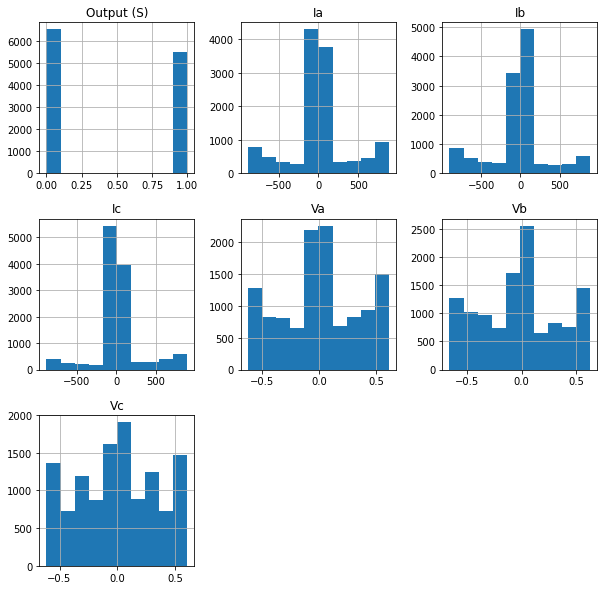

In [14]:
# Histogram using pandas 
df.hist(figsize=(10,10))


### Count plot

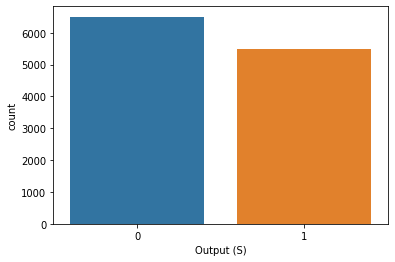

In [15]:
# count plot of Output (S) column
ax = sns.countplot(x='Output (S)', data=df)

# Box plot


A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

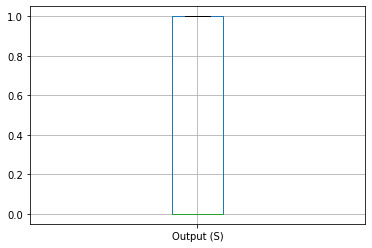

In [16]:
# box plot using pandas 
# box plot for Output (S) column 
df.boxplot(column=['Output (S)'])


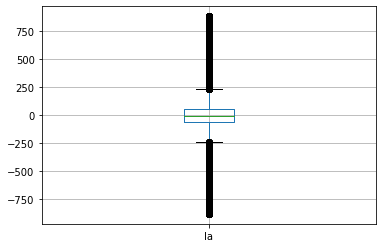

In [17]:
# box plot using pandas 
# box plot for Ia column 
df.boxplot(column=['Ia'])


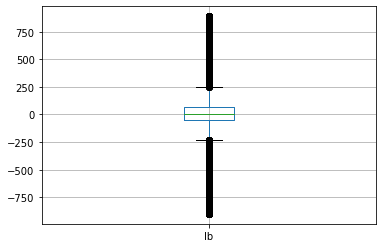

In [18]:
# box plot using pandas 
# box plot for Ib column 
df.boxplot(column=['Ib'])

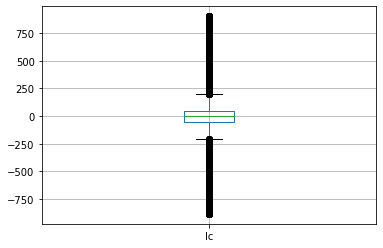

In [19]:
# box plot using pandas 
# box plot for Ic column 

df.boxplot(column=['Ic'])

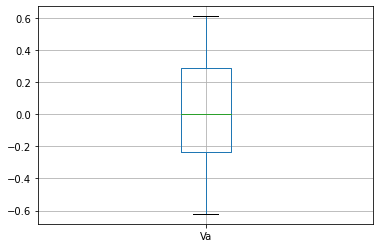

In [20]:
# box plot using pandas 
# box plot for Va column 
df.boxplot(column=['Va'])

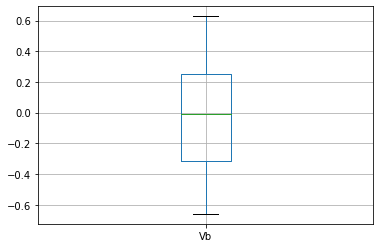

In [21]:
# box plot using pandas 
# box plot for Vb column 
df.boxplot(column=['Vb'])



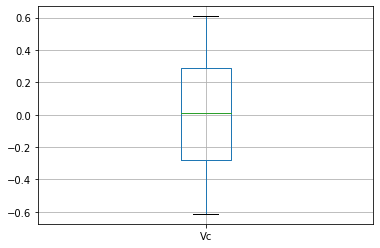

In [22]:
# box plot using pandas 
# box plot for Vc column 

df.boxplot(column=['Vc'])

Dataset is balanced and not skewed in nature

# Dendrogram

{'color_list': ['g', 'g', 'g', 'b', 'b', 'b'],
 'dcoord': [[0.0, 65.34596130795325, 65.34596130795325, 0.0],
  [0.0, 67.01415633607897, 67.01415633607897, 65.34596130795325],
  [0.0, 82.52986099383631, 82.52986099383631, 67.01415633607897],
  [0.0, 33168.56031083497, 33168.56031083497, 82.52986099383631],
  [0.0, 39264.19660404491, 39264.19660404491, 33168.56031083497],
  [0.0, 41317.224275036024, 41317.224275036024, 39264.19660404491]],
 'icoord': [[55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [25.0, 25.0, 43.75, 43.75],
  [15.0, 15.0, 34.375, 34.375],
  [5.0, 5.0, 24.6875, 24.6875]],
 'ivl': ['Ia', 'Ib', 'Ic', 'Output (S)', 'Vb', 'Va', 'Vc'],
 'leaves': [1, 2, 3, 0, 5, 4, 6]}

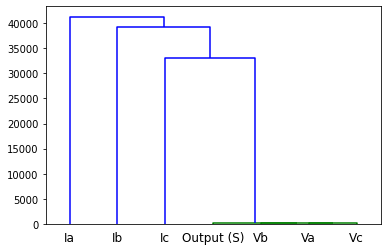

In [23]:
# Plot a Dendrogram on the columns of the dataset
X = df.T.values #Transpose values 
Y = pdist(X)
Z = linkage(Y)
dendrogram(Z, labels = df.columns)

# Preprocessing, Modeling and prediction on test data

In [24]:
## Split the labels and the target
Y=df.iloc[:,0]
X=df.iloc[:,1:]

#check the shape 
print(X.shape)
print(Y.shape)

(12001, 6)
(12001,)


In [25]:
# import train test split
from sklearn.model_selection import train_test_split
# Splitting into training (80%) and testing set (20%)
X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size=.20, random_state=42)

# checking shape of X_train and y_train
print(X_train.shape,y_train.shape)

# checking shape of X_test and y_test
print(X_test.shape,y_test.shape)

(9600, 6) (9600,)
(2401, 6) (2401,)


### Scaling

In [26]:
# import min max scalar
from sklearn.preprocessing import MinMaxScaler
# Instantiate t
scaled = MinMaxScaler()

# fit on train data
X_train = scaled.fit_transform(X_train)
# fit on test data
X_test = scaled.transform(X_test)

In [27]:
# Visualizing importance of all the features in the dataset for the prediction
#didnt use
def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df], 
                                      axis=0, ignore_index=True)

    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]
    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x='feature_importance', 
                  y='column', 
                  order=order, 
                  ax=ax, 
                  palette='viridis', 
                  orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig, ax

In [28]:
# importing accuracy_score, precision_score, precision_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

## LogisticRegression

Accuracy: 0.7338608912952936
F1 score: 0.5880077369439072
Recall: 0.41643835616438357
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80      1306
           1       1.00      0.42      0.59      1095

    accuracy                           0.73      2401
   macro avg       0.84      0.71      0.70      2401
weighted avg       0.82      0.73      0.71      2401


 confussion matrix:
 [[1306    0]
 [ 639  456]]


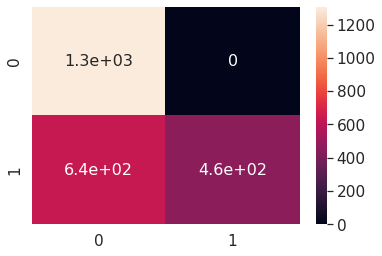

In [29]:

#A logistic Regression model to the train dataset

# Import logisticRegressor
from sklearn.linear_model import LogisticRegression

# Instantiate the model
lr=LogisticRegression()

# fitting the model on train data
lr.fit(X_train,y_train)

#predict on test data
prediction=lr.predict(X_test)
importance = lr.coef_[0]
# print accuracy_score,precision_score,precision_score,confusion_matrix
print ('Accuracy:', accuracy_score(y_test, prediction))
print ('F1 score:', f1_score(y_test, prediction))
print ('Recall:', recall_score(y_test, prediction))
print ('Precision:', precision_score(y_test, prediction))
print ('\n clasification report:\n', classification_report(y_test,prediction))
print ('\n confussion matrix:\n',confusion_matrix(y_test, prediction))


# display confusion matrix
cm=confusion_matrix(y_test,prediction)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size


## RandomForestClassifier

Accuracy: 0.9979175343606831
F1 score: 0.9977200182398541
Recall: 0.9990867579908675
Precision: 0.9963570127504554

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401


 confussion matrix:
 [[1302    4]
 [   1 1094]]


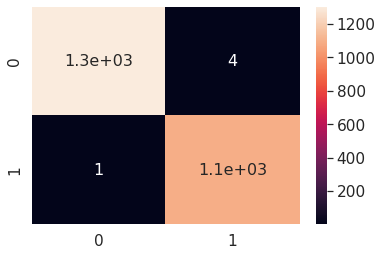

In [30]:
#%%time
#A RandomForestClassifier model to the train dataset
from sklearn.ensemble import RandomForestClassifier
#import RandomForestClassifier


# Instantiate the model
Rm=RandomForestClassifier(random_state=0)

# fitting the model on train data
Rm.fit(X_train,y_train)

# predict on test data
prediction=Rm.predict(X_test)
importance = Rm.feature_importances_
# print accuracy_score,precision_score,precision_score,confusion_matrix
print ('Accuracy:', accuracy_score(y_test, prediction))
print ('F1 score:', f1_score(y_test, prediction))
print ('Recall:', recall_score(y_test, prediction))
print ('Precision:', precision_score(y_test, prediction))
print ('\n clasification report:\n', classification_report(y_test,prediction))
print ('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
# display confusion matrix
cm=confusion_matrix(y_test,prediction)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size




## DecisionTreeClassifier

Accuracy: 0.9958350687213661
F1 score: 0.9954379562043796
Recall: 0.9963470319634703
Precision: 0.9945305378304466

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       0.99      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401


 confussion matrix:
 [[1300    6]
 [   4 1091]]
CPU times: user 195 ms, sys: 54.6 ms, total: 250 ms
Wall time: 188 ms


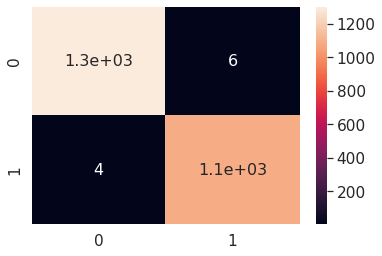

In [31]:
%%time
#A DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
Dt=DecisionTreeClassifier()

# fitting the model on train data
Dt.fit(X_train,y_train)

# predict on test data
prediction=Dt.predict(X_test)
importance = Dt.feature_importances_
# print accuracy_score,precision_score,precision_score,confusion_matrix
print ('Accuracy:', accuracy_score(y_test, prediction))
print ('F1 score:', f1_score(y_test, prediction))
print ('Recall:', recall_score(y_test, prediction))
print ('Precision:', precision_score(y_test, prediction))
print ('\n clasification report:\n', classification_report(y_test,prediction))
print ('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
# display confusion matrix
cm=confusion_matrix(y_test,prediction)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size





## GradientBoostingClassifier

Accuracy: 0.9979175343606831
F1 score: 0.9977200182398541
Recall: 0.9990867579908675
Precision: 0.9963570127504554

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401


 confussion matrix:
 [[1302    4]
 [   1 1094]]
CPU times: user 2.21 s, sys: 60.4 ms, total: 2.27 s
Wall time: 2.19 s


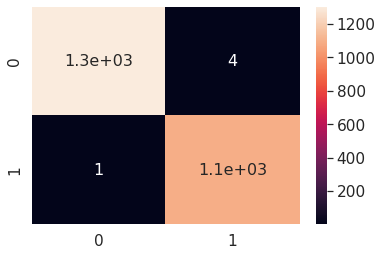

In [32]:
%%time
# A Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model

Gbc=GradientBoostingClassifier()
# fitting the model on train data
Gbc.fit(X_train,y_train)

# predict on test data
prediction=Gbc.predict(X_test)
#importance = Gbc.feature_importances_
# print accuracy_score,precision_score,precision_score,confusion_matrix
print ('Accuracy:', accuracy_score(y_test, prediction))
print ('F1 score:', f1_score(y_test, prediction))
print ('Recall:', recall_score(y_test, prediction))
print ('Precision:', precision_score(y_test, prediction))
print ('\n clasification report:\n', classification_report(y_test,prediction))
print ('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
# display confusion matrix
cm=confusion_matrix(y_test,prediction)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size




## Hyper parameter tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

###RandomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

1. The first step is to write the parameters that we want to consider
2. From these parameters select the best ones.(which are printed in output)

In [37]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
  # Fit the random search model
  random.fit(X_train, y_train)
  print(random.best_params_)

In [38]:
#%%time
# for random forest classifier
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
            }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestClassifier(),X_train, y_train, param_grid=rf_para_grid)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 1800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False}


### working with best model

In [41]:
# print Area under ROC of Model On Test Set
from sklearn.metrics import roc_auc_score
Rm=RandomForestClassifier(random_state=0,n_estimators=1800, min_samples_split= 10, min_samples_leaf=1, max_features= 'auto', max_depth=80, bootstrap= False)
Rm.fit(X_train,y_train)
predictions =Rm.predict_proba(X_test)
roc_auc_score(y_test,predictions[:,1])

0.9999531491465453

In [43]:
# Create a dataframe with predicted result as data using best model

y_pred=Rm.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred.head()

,0
0,0
1,1
2,0
3,0
4,0


# Conclusion

According to this model, the predicted value we got, matches with the actual target values. The model is performing well.  We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning and did prediction.